In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [ ]:
import math

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

### IMDB Test

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32

In [ ]:
print('laoding data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
print(len(input_train), 'train_')
print(len(input_test), 'test_')

print(input_train.shape)
print(input_test.shape)

In [ ]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

input_train.shape
input_test.shape

In [ ]:
input_train[0]

In [ ]:
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.layers import LSTM

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Tune start

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv('./extract_seoul.csv')

In [3]:
data = data.drop(['Unnamed: 0'],1)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 30 columns):
Date               188 non-null datetime64[ns]
Total              188 non-null float64
Seoul              188 non-null float64
Northern seoul     188 non-null float64
Gangbuk-gu         188 non-null float64
Gwangjin-gu        188 non-null float64
Nowon-gu           188 non-null float64
Dobong-gu          188 non-null float64
Dongdaemun-gu      188 non-null float64
Mapo-gu            188 non-null float64
Seodaemun-gu       188 non-null float64
Seongdong-gu       188 non-null float64
Seongbuk-gu        188 non-null float64
Yongsan-gu         188 non-null float64
Eunpyeong-gu       188 non-null float64
Jongno-gu          188 non-null float64
Jung-gu            188 non-null float64
Jungnang-gu        188 non-null float64
Southern Seoul     188 non-null float64
Gangnam-gu         188 non-null float64
Gangdong-gu        188 non-null float64
Gangseo-gu         188 non-null float64
Gwanak-g

In [6]:
GU_ENG_NAME = ''

### Dict 관련 함수 선언

In [7]:
def create_dict(a, b):
    d = dict()
    #갯수 다르면
    if len(a)-len(b) != 0:
        for i in range(len(a)-len(b)):
            b.append(None)
    #갯수 같으면
    for j in range(len(a)):
        d[a[j]] = b[j]
    return d

In [8]:
def find_val_using_key(dic, key):
    if key in dic:
        return dic[key]
    else:
        print('404 not found')
        return dic['서울']

In [9]:
def find_key_using_val(dic, val):
    return [k for k, v in dic.items() if v == val][0]

### 원하는 구만 선택하기

In [10]:
def select_gu_data(df, gu_name):
    gu_name += '-gu'
    global GU_ENG_NAME
    
    GU_ENG_NAME = gu_name
    
    return df[['Date', gu_name]]
    

In [52]:
BASE_PATH = './TimeSeries/'
MODEL_NAME = 'LSTM'

In [53]:
gangnam = select_gu_data(data, 'Gangnam')
print(GU_ENG_NAME)
# gangnam_array = np.array(gangnam)
# gangnam_data = gangnam_array.reshape(-1,1)
# gangnam_data.shape

Gangnam-gu


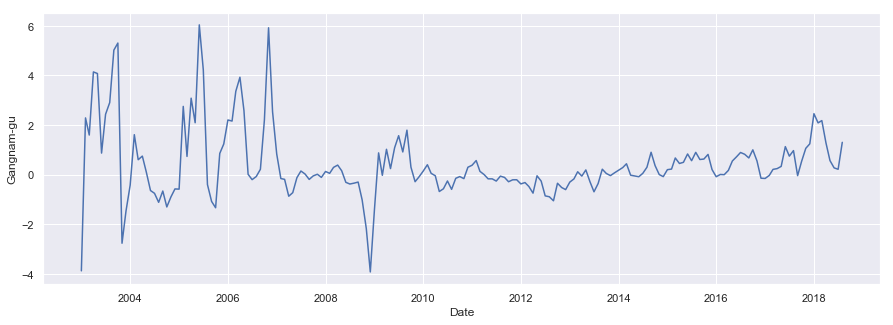

In [54]:
plt.figure(figsize = (15, 5))
ax = sns.lineplot(x="Date", y=GU_ENG_NAME, data=gangnam)

In [74]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [103]:
import math

In [75]:
gangnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
Date          188 non-null datetime64[ns]
Gangnam-gu    188 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [76]:
mask = pd.to_datetime('2010-01-01')
tmp = gangnam.loc[:][gangnam['Date'] >= mask]

In [77]:
gangnam_tmp = tmp.drop('Date', 1)

In [78]:
gangnam_tmp

,Gangnam-gu
84,0.146998
85,0.401215
86,0.054086
87,-0.042543
88,-0.678413
89,-0.567626
90,-0.254231
91,-0.591100
92,-0.146213
93,-0.075991


### Normalize

In [79]:
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(gangnam_tmp)

In [80]:
dataset

array([[0.34161309],
       [0.41399694],
       [0.31515787],
       [0.28764442],
       [0.10659095],
       [0.13813561],
       [0.22736977],
       [0.13145184],
       [0.25812596],
       [0.27812051],
       [0.25453416],
       [0.38518202],
       [0.40807148],
       [0.4620269 ],
       [0.33802372],
       [0.30129167],
       [0.25218556],
       [0.25185434],
       [0.22652257],
       [0.28290495],
       [0.26834486],
       [0.21884845],
       [0.24098452],
       [0.24156698],
       [0.19396314],
       [0.2093965 ],
       [0.16411628],
       [0.08794883],
       [0.28715331],
       [0.22577299],
       [0.05649797],
       [0.04641818],
       [0.        ],
       [0.20161524],
       [0.15261872],
       [0.12839877],
       [0.21444004],
       [0.25118653],
       [0.33334945],
       [0.28397418],
       [0.35422305],
       [0.21846023],
       [0.1035275 ],
       [0.19847166],
       [0.36285748],
       [0.31389134],
       [0.28915095],
       [0.320

In [81]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (83, 21)


In [82]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [83]:
window_size = 4

In [84]:
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)

whole_X, whole_Y = create_dataset(dataset, window_size)
print("Original training data shape:")
print(whole_X.shape)
print(whole_Y.shape)

Original training data shape:
(99, 4)
(99,)


In [85]:
train_Y[:10]

array([0.10659095, 0.13813561, 0.22736977, 0.13145184, 0.25812596,
       0.27812051, 0.25453416, 0.38518202, 0.40807148, 0.4620269 ])

In [86]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

whole_X = np.reshape(whole_X, (whole_X.shape[0], 1, whole_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

New training data shape:
(78, 1, 4)


In [96]:
if not os.path.exists(BASE_PATH):
    os.mkdir(BASE_PATH)

def create_checkpoint(model_name):
    MODEL_PATH = os.path.join(BASE_PATH, model_name)
    print("Model_path : ", MODEL_PATH)
    
    
    if not os.path.exists(MODEL_PATH):
        os.mkdir(MODEL_PATH)
    
    return ModelCheckpoint(filepath=os.path.join(MODEL_PATH, 'loss-{loss:.6f}.hdf5'),
                           monitor='loss',
                           verbose=1,
                           save_best_only=True)

early_stopping = EarlyStopping(monitor='loss', patience=50)

In [99]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    model.add(LSTM(12,return_sequences=True, input_shape = (1, window_size)))
    model.add(LSTM(12,return_sequences=True))
    model.add(LSTM(12))
    model.add(Dense(1))
    
#     adam = Adam(lr=0.00146, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6, amsgrad=False)
    adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6, amsgrad=False)
    checkloss = create_checkpoint(MODEL_NAME)
    
    model.compile(loss = "mean_squared_error", 
                  optimizer = adam)
    model.fit(train_X, train_Y, epochs = 500, batch_size = 2, verbose = 2, callbacks=[early_stopping, checkloss])
    
    return(model)

In [100]:
model1 = fit_model(train_X, train_Y, window_size)

Model_path :  ./TimeSeries/LSTM
Epoch 1/500
 - 3s - loss: 0.1052

Epoch 00001: loss improved from inf to 0.10516, saving model to ./TimeSeries/LSTM/loss-0.105157.hdf5
Epoch 2/500
 - 0s - loss: 0.0819

Epoch 00002: loss improved from 0.10516 to 0.08188, saving model to ./TimeSeries/LSTM/loss-0.081876.hdf5
Epoch 3/500
 - 0s - loss: 0.0579

Epoch 00003: loss improved from 0.08188 to 0.05790, saving model to ./TimeSeries/LSTM/loss-0.057904.hdf5
Epoch 4/500
 - 0s - loss: 0.0340

Epoch 00004: loss improved from 0.05790 to 0.03404, saving model to ./TimeSeries/LSTM/loss-0.034040.hdf5
Epoch 5/500
 - 0s - loss: 0.0185

Epoch 00005: loss improved from 0.03404 to 0.01852, saving model to ./TimeSeries/LSTM/loss-0.018517.hdf5
Epoch 6/500
 - 0s - loss: 0.0140

Epoch 00006: loss improved from 0.01852 to 0.01401, saving model to ./TimeSeries/LSTM/loss-0.014014.hdf5
Epoch 7/500
 - 0s - loss: 0.0134

Epoch 00007: loss improved from 0.01401 to 0.01339, saving model to ./TimeSeries/LSTM/loss-0.013385.hdf5

 - 0s - loss: 0.0074

Epoch 00067: loss did not improve from 0.00737
Epoch 68/500
 - 0s - loss: 0.0073

Epoch 00068: loss improved from 0.00737 to 0.00732, saving model to ./TimeSeries/LSTM/loss-0.007323.hdf5
Epoch 69/500
 - 0s - loss: 0.0074

Epoch 00069: loss did not improve from 0.00732
Epoch 70/500
 - 0s - loss: 0.0073

Epoch 00070: loss improved from 0.00732 to 0.00728, saving model to ./TimeSeries/LSTM/loss-0.007282.hdf5
Epoch 71/500
 - 0s - loss: 0.0073

Epoch 00071: loss did not improve from 0.00728
Epoch 72/500
 - 0s - loss: 0.0073

Epoch 00072: loss did not improve from 0.00728
Epoch 73/500
 - 0s - loss: 0.0073

Epoch 00073: loss improved from 0.00728 to 0.00727, saving model to ./TimeSeries/LSTM/loss-0.007266.hdf5
Epoch 74/500
 - 0s - loss: 0.0074

Epoch 00074: loss did not improve from 0.00727
Epoch 75/500
 - 0s - loss: 0.0072

Epoch 00075: loss improved from 0.00727 to 0.00722, saving model to ./TimeSeries/LSTM/loss-0.007216.hdf5
Epoch 76/500
 - 0s - loss: 0.0073

Epoch 00

 - 0s - loss: 0.0068

Epoch 00155: loss did not improve from 0.00674
Epoch 156/500
 - 0s - loss: 0.0067

Epoch 00156: loss improved from 0.00674 to 0.00673, saving model to ./TimeSeries/LSTM/loss-0.006729.hdf5
Epoch 157/500
 - 0s - loss: 0.0068

Epoch 00157: loss did not improve from 0.00673
Epoch 158/500
 - 0s - loss: 0.0068

Epoch 00158: loss did not improve from 0.00673
Epoch 159/500
 - 0s - loss: 0.0069

Epoch 00159: loss did not improve from 0.00673
Epoch 160/500
 - 0s - loss: 0.0070

Epoch 00160: loss did not improve from 0.00673
Epoch 161/500
 - 0s - loss: 0.0071

Epoch 00161: loss did not improve from 0.00673
Epoch 162/500
 - 0s - loss: 0.0069

Epoch 00162: loss did not improve from 0.00673
Epoch 163/500
 - 0s - loss: 0.0069

Epoch 00163: loss did not improve from 0.00673
Epoch 164/500
 - 0s - loss: 0.0069

Epoch 00164: loss did not improve from 0.00673
Epoch 165/500
 - 0s - loss: 0.0069

Epoch 00165: loss did not improve from 0.00673
Epoch 166/500
 - 0s - loss: 0.0067

Epoch 0


Epoch 00248: loss did not improve from 0.00662
Epoch 249/500
 - 0s - loss: 0.0067

Epoch 00249: loss did not improve from 0.00662
Epoch 250/500
 - 0s - loss: 0.0067

Epoch 00250: loss did not improve from 0.00662
Epoch 251/500
 - 0s - loss: 0.0067

Epoch 00251: loss did not improve from 0.00662
Epoch 252/500
 - 0s - loss: 0.0068

Epoch 00252: loss did not improve from 0.00662
Epoch 253/500
 - 0s - loss: 0.0069

Epoch 00253: loss did not improve from 0.00662
Epoch 254/500
 - 0s - loss: 0.0066

Epoch 00254: loss did not improve from 0.00662
Epoch 255/500
 - 0s - loss: 0.0067

Epoch 00255: loss did not improve from 0.00662
Epoch 256/500
 - 0s - loss: 0.0067

Epoch 00256: loss did not improve from 0.00662
Epoch 257/500
 - 0s - loss: 0.0066

Epoch 00257: loss did not improve from 0.00662
Epoch 258/500
 - 0s - loss: 0.0066

Epoch 00258: loss improved from 0.00662 to 0.00661, saving model to ./TimeSeries/LSTM/loss-0.006611.hdf5
Epoch 259/500
 - 0s - loss: 0.0067

Epoch 00259: loss did not im


Epoch 00344: loss did not improve from 0.00654
Epoch 345/500
 - 0s - loss: 0.0067

Epoch 00345: loss did not improve from 0.00654
Epoch 346/500
 - 0s - loss: 0.0066

Epoch 00346: loss did not improve from 0.00654
Epoch 347/500
 - 0s - loss: 0.0066

Epoch 00347: loss did not improve from 0.00654
Epoch 348/500
 - 0s - loss: 0.0066

Epoch 00348: loss did not improve from 0.00654
Epoch 349/500
 - 0s - loss: 0.0068

Epoch 00349: loss did not improve from 0.00654
Epoch 350/500
 - 0s - loss: 0.0066

Epoch 00350: loss did not improve from 0.00654
Epoch 351/500
 - 0s - loss: 0.0066

Epoch 00351: loss did not improve from 0.00654
Epoch 352/500
 - 0s - loss: 0.0067

Epoch 00352: loss did not improve from 0.00654


In [101]:
def predict_and_score(model, X, Y):
    pred = scaler.inverse_transform(model.predict(X))
    # 0 ~ 1 inverse origin
    orig_data = scaler.inverse_transform([Y])
    
    #RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

In [104]:
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

whole_test, whole_predict = predict_and_score(model1, whole_X, whole_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)
print("Whole data score: %.2f RMSE " % whole_test)

Training data score: 0.28 RMSE
Test data score: 0.60 RMSE
Whole data score: 0.36 RMSE 


In [110]:
def start_predict_n_plot(dataset, train_predict, test_predict):
    train_predict_plot = np.empty_like(dataset)
    train_predict_plot[:, :] = np.nan
    
    ##땡기자
    print("window_size: ", window_size)
    train_predict_plot[(window_size - 1) : len(train_predict) + (window_size - 1)] = train_predict

    
    test_predict_plot = np.empty_like(dataset)
    test_predict_plot[:, :] = np.nan
#     test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1] = test_predict
    test_predict_plot[(window_size - 1): len(whole_predict) + (window_size - 1), :] = whole_predict
    
    print(test_predict_plot.shape)
    print(whole_predict.shape)

    plt.figure(figsize = (15, 5))
    plt.plot(scaler.inverse_transform(dataset), label = "True value")
    plt.plot(train_predict_plot, label = "Training set pred")
    plt.plot(test_predict_plot, label = "Test set pred")
    plt.xlabel("Month")
    plt.ylabel("Price")
    plt.title("Gangnam Train/test Predict")
    plt.legend()
    plt.show()

window_size:  4
(104, 1)
(99, 1)


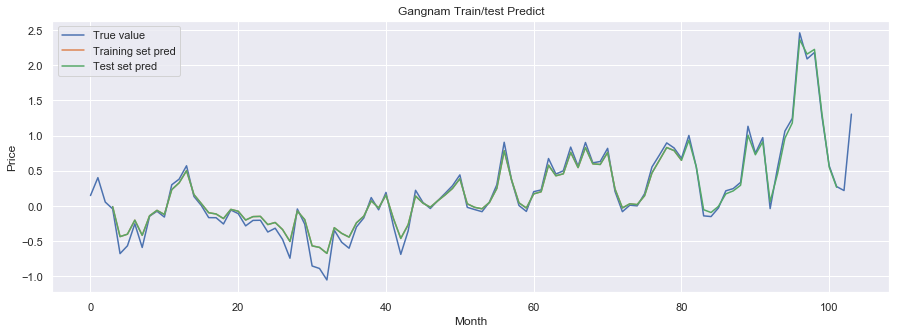

In [111]:
start_predict_n_plot(dataset, train_predict, test_predict)